<AxesSubplot:>

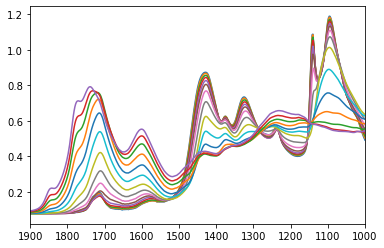

In [1]:
import numpy
import pandas
from matplotlib import pyplot
filename = "dataframe.csv"
data = pandas.read_csv(filename, header=0, index_col=0).T
data.index = pandas.read_csv(filename, header=None, index_col=0).iloc[0].values
xmax, xmin = 1900, 1000
data = data.iloc[:, (xmin <= data.columns) & (data.columns <= xmax)]
data.T.plot(legend=None, xlim=[data.columns.max(), data.columns.min()])

In [2]:
# view spectra
from ipywidgets import Play, IntSlider, jslink, HBox, interactive_output

def f(i):
    y = data.iloc[i]
    pyplot.figure(figsize=(8, 6))
    pyplot.xlim(x.max(), x.min())
    pyplot.ylim(data.min().min(), data.max().max())
    pyplot.plot(x, y)
    pyplot.show()

x = data.columns
play = Play(min=0, max=len(data) - 1, step=1, interval=100)
slider = IntSlider(min=0, max=len(data) - 1, step=1)
jslink((play, "value"), (slider, "value"))
display(HBox([play, slider]), interactive_output(f, {"i": slider}))

Output()

In [3]:
# intensity variation
from ipywidgets import IntSlider, interactive_output

def f(i):
	j = len(data.T) - 1 - i
	print("i =", j, " pos =", x[j])
	pyplot.xlim(x.max(), x.min())
	pyplot.ylim(y.min(), y.max())
	pyplot.plot(x, y)
	pyplot.plot([x[j], x[j]], [y.min(), y.max()])
	pyplot.show()
	pyplot.xlim(s.min(), s.max())
	#pyplot.ylim(y.min(), y.max())
	pyplot.scatter(s, data.iloc[:,j].values)
	pyplot.show()

x = data.columns
s = data.index
y = data.values.T
slider = IntSlider(min=0, max=len(data.T)-1, step=1)
display(slider, interactive_output(f, {"i": slider}))

IntSlider(value=0, max=450)

Output()

In [ ]:
# save intensity variation
j = len(data.T) - 1 - slider.get_interact_value()
print("i =", j, " pos =", x[j])
buff = pandas.Series(data.iloc[:,j].values, index=data.index)
buff.plot()
#buff.to_csv(str(x[j])+".csv", header=False)

In [ ]:
# save area intensity
left, right = 36, 27
print(data.columns[left+1], "-", data.columns[right])
buff = data.iloc[:,right:left+1].T.sum()
buff.plot()
#buff.to_csv(str(x[left])+"_"+str(x[right])+".csv", header=False)

In [ ]:
# smoothing
from ipywidgets import IntSlider, interactive_output
from scipy.signal import savgol_filter

def f(i):
    buff = savgol_filter(y, i, 2, 0)
    pyplot.xlim(x.max(), x.min())
    pyplot.ylim(y.min(), y.max())
    pyplot.scatter(x, y, s=5, c="blue")
    pyplot.plot(x, buff, c="red")
    pyplot.show()
    pyplot.xlim(x.max(), x.min())
    pyplot.ylim((y.min() - y.max()) / 2, (y.max() - y.min()) / 2)
    pyplot.scatter(x, y - buff, s=5, c="green")
    pyplot.show()

secder = False
x = data.columns
y = data.values[-1]
slider = IntSlider(min=3, max=51, step=2)
display(slider, interactive_output(f, {"i": slider}))

In [ ]:
# 2nd derivative
from ipywidgets import IntSlider, interactive_output
from scipy.signal import savgol_filter

def f(i):
    buff = savgol_filter(y, i, 2, 0)
    pyplot.xlim(x.max(), x.min())
    pyplot.ylim(y.min(), y.max())
    pyplot.scatter(x, y, s=5, c="blue")
    pyplot.plot(x, buff, c="red")
    pyplot.show()
    buff = savgol_filter(buff, i, 2, 1)
    buff = savgol_filter(buff, i, 2, 0)
    buff = savgol_filter(buff, i, 2, 1)
    pyplot.xlim(x.max(), x.min())
    pyplot.ylim(ymin, ymax)
    pyplot.plot(x, buff, c="red")
    pyplot.show()

secder = True
x = data.columns
y = data.values[-1]
buff = savgol_filter(y, 3, 2, 2)
ymin, ymax = buff.min(), buff.max()
slider = IntSlider(min=3, max=51, step=2)
display(slider, interactive_output(f, {"i": slider}))

In [ ]:
# smoothing or 2nd derivative for all spectra
flag = False
#flag = True
window = slider.get_interact_value()
print("window size =", x[window - 1] - x[0])
buff = data
buff = savgol_filter(buff, window, 2, 0)
if secder:
    buff = savgol_filter(buff, window, 2, 1)
    buff = savgol_filter(buff, window, 2, 0)
    buff = savgol_filter(buff, window, 2, 1)
buff = pandas.DataFrame(buff, index=data.index, columns=data.columns)
buff.T.plot(legend=None, xlim=[buff.columns.max(), buff.columns.min()])
if flag: data = buff